In [77]:
#Student Result Visualization
 

In [78]:

#Question:
#Can you design a visual report that displays student marks, averages, and grade distributions across subjects?


In [79]:
#Summary:
#This project helps visualize academic performance by student and subject, enabling educators to  assess trends and identify underperforming areas.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
import warnings

In [81]:
#Data Cleaning 

In [82]:
df = pd.read_csv("MOCK_DATA (7).csv")

In [83]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      1000 non-null   object 
 1   Student_Name    1000 non-null   object 
 2   Class           1000 non-null   int64  
 3   Section         1000 non-null   object 
 4   Term            1000 non-null   object 
 5   Maths           1000 non-null   int64  
 6   Science         1000 non-null   int64  
 7   Social_Science  1000 non-null   int64  
 8   English         1000 non-null   int64  
 9   Hindi           1000 non-null   int64  
 10  Marks_Score     1000 non-null   int64  
 11  Total_Marks     1000 non-null   int64  
 12  Percentage      1000 non-null   float64
 13  Result          1000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 109.5+ KB


In [84]:

sns.set_style("darkgrid")
sns.set_palette("viridis")
plt.rcParams['figure.dpi'] = 100 # High resolution plots
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

In [85]:
def assign_grade(percentage):
    if percentage >= 90:
        return 'A+'
    elif percentage >= 80:
        return 'A'
    elif percentage >= 70:
        return 'B+'
    elif percentage >= 60:
        return 'B'
    elif percentage >= 50:
        return 'C'
    elif percentage >= 40:
        return 'D'
    else:
        return 'F'

In [86]:
df['Grade'] = df['Percentage'].apply(assign_grade)

In [87]:
df_sorted = df.sort_values(by='Percentage', ascending=False)

In [88]:
top_performers = df_sorted.groupby('Class').head(1)

# Display relevant columns
print(top_performers[['Class', 'Student_ID', 'Student_Name', 'Section', 'Term', 'Percentage', 'Grade']])

     Class Student_ID         Student_Name Section    Term  Percentage Grade
223      2       S315        Briney Cayton       B  Term 1        89.2     A
509      7       S726       Stewart Hunter       B  Term 2        88.2     A
78       3       S259  Kingsley Do Rosario       B  Term 2        86.8     A
204      4       S167      Randolf McNiven       A  Term 1        86.0     A
648     10       S703     Leonard Killshaw       B  Term 1        84.4     A
236     12       S106          Nico Baumer       A  Term 2        82.6     A
313      6       S428       Marilin Cortes       A  Term 1        81.6     A
355      9       S139       Kasey Houseago       B  Term 1        81.0     A
872     11       S040       Vergil Bourrel       A  Term 1        80.6     A
79       8       S723  Anthiathia Corcoran       A  Term 1        80.6     A
827      5       S920          Dael Gresty       A  Term 1        79.8    B+
324      1       S376       Morey Fairhall       A  Term 1        77.4    B+

In [19]:
def assign_grade(percentage):
    if percentage >= 90:
        return 'A+'
    elif percentage >= 80:
        return 'A'
    elif percentage >= 70:
        return 'B+'
    elif percentage >= 60:
        return 'B'
    elif percentage >= 50:
        return 'C'
    elif percentage >= 40:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Percentage'].apply(assign_grade)


In [21]:
average_scores = df[['Maths', 'Science', 'English', 'Hindi']].mean()
grade_distribution = df['Grade'].value_counts()

In [31]:
top_performers = df.sort_values(by='Percentage', ascending=False).groupby('Class').head(1)
print(top_performers)

    Student_ID         Student_Name  Class Section    Term  Maths  Science  \
223       S315        Briney Cayton      2       B  Term 1     91       92   
509       S726       Stewart Hunter      7       B  Term 2     69       92   
78        S259  Kingsley Do Rosario      3       B  Term 2     78       96   
204       S167      Randolf McNiven      4       A  Term 1     85       89   
648       S703     Leonard Killshaw     10       B  Term 1     69       87   
236       S106          Nico Baumer     12       A  Term 2     83       97   
313       S428       Marilin Cortes      6       A  Term 1     73       84   
355       S139       Kasey Houseago      9       B  Term 1     80       98   
872       S040       Vergil Bourrel     11       A  Term 1     74       92   
79        S723  Anthiathia Corcoran      8       A  Term 1     83       90   
827       S920          Dael Gresty      5       A  Term 1     86       90   
324       S376       Morey Fairhall      1       A  Term 1     6

In [ ]:
#visualization CHarts

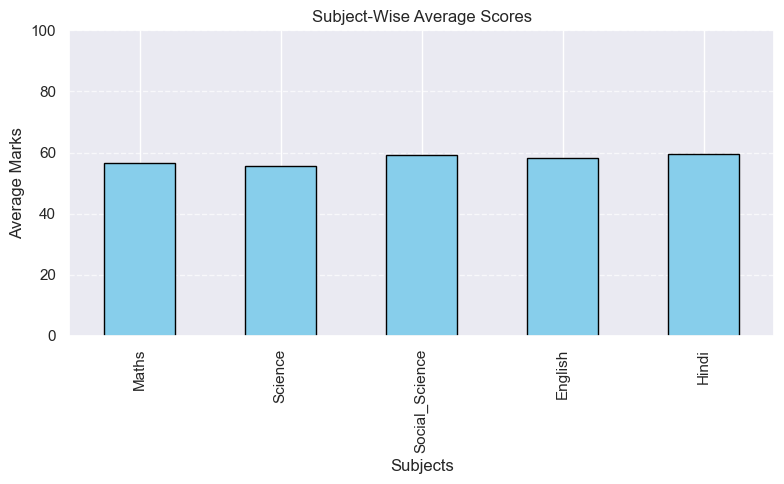

In [96]:


# Calculate average score per subject
average_scores = df[['Maths', 'Science', 'Social_Science', 'English', 'Hindi']].mean()

# Create bar chart
plt.figure(figsize=(8, 5))
average_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Subject-Wise Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


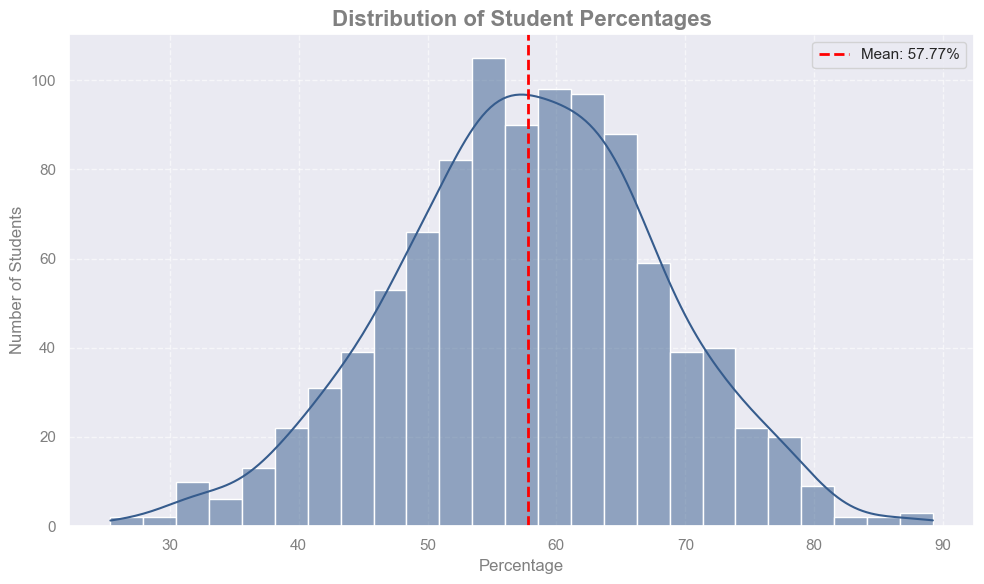

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Percentage'], kde=True, bins=25, color=sns.color_palette("viridis")[1])
plt.title('Distribution of Student Percentages', fontsize=16, fontweight='bold', color='gray')
plt.xlabel('Percentage', fontsize=12, color='gray')
plt.ylabel('Number of Students', fontsize=12, color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.axvline(df['Percentage'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Percentage'].mean():.2f}%")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

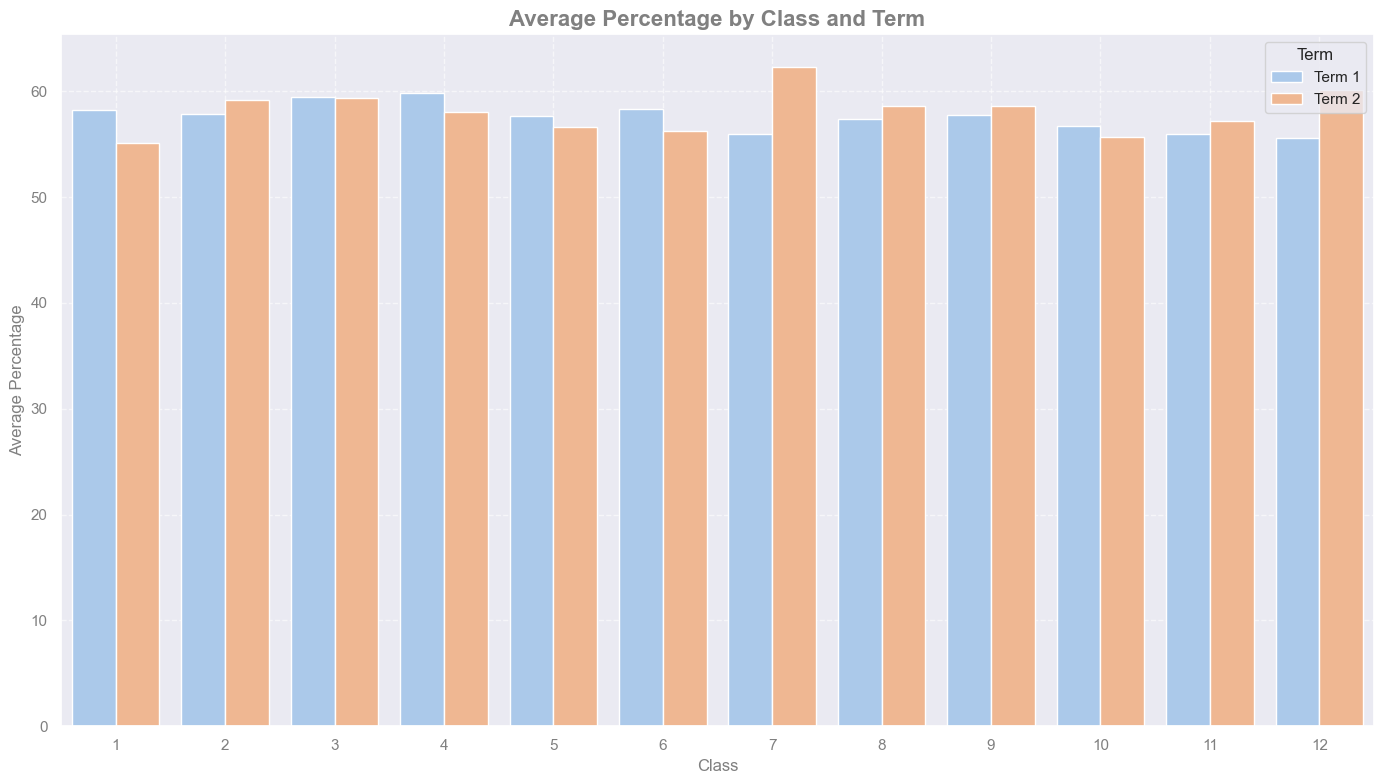

In [ ]:

plt.figure(figsize=(14, 8))
sns.barplot(x='Class', y='Percentage', hue='Term', data=df, errorbar=None, palette='pastel')
plt.title('Average Percentage by Class and Term', fontsize=16, fontweight='bold', color='gray')
plt.xlabel('Class', fontsize=12, color='gray')
plt.ylabel('Average Percentage', fontsize=12, color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.legend(title='Term', loc='upper right', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13968\3567745383.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




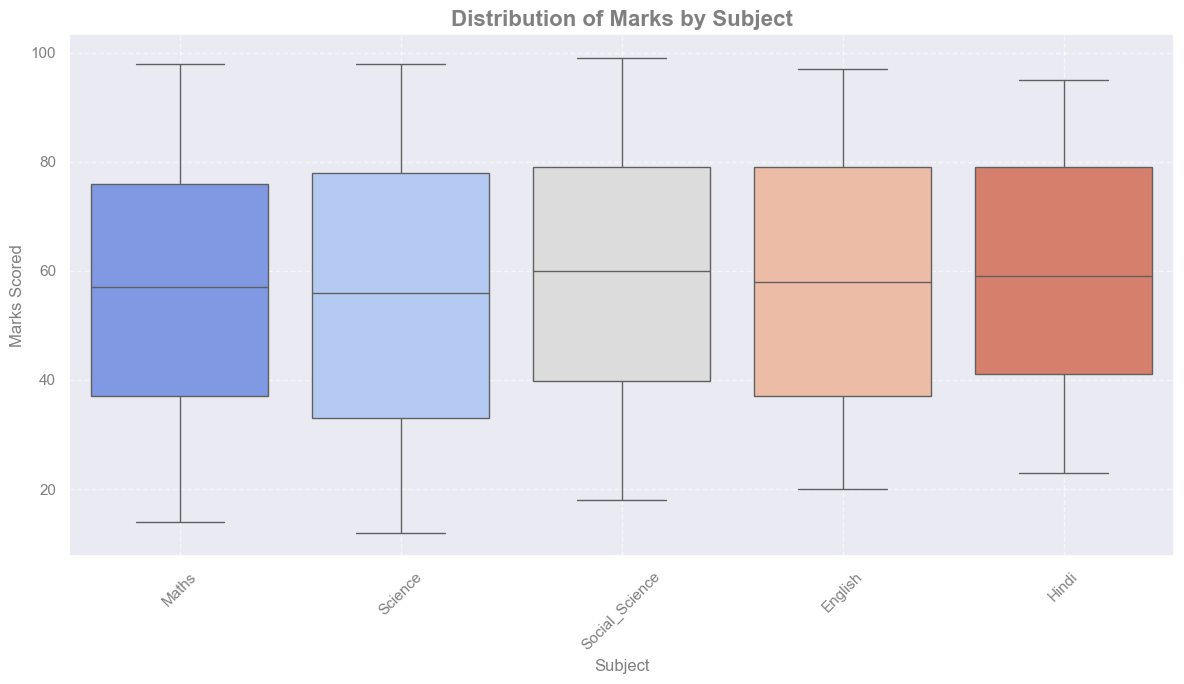

In [ ]:

subject_cols = ['Maths', 'Science', 'Social_Science', 'English', 'Hindi']
df_melted = df.melt(id_vars=['Student_Name', 'Class', 'Term'], value_vars=subject_cols, var_name='Subject', value_name='Marks')

plt.figure(figsize=(12, 7))
sns.boxplot(x='Subject', y='Marks', data=df_melted, palette='coolwarm')
plt.title('Distribution of Marks by Subject', fontsize=16, fontweight='bold', color='gray')
plt.xlabel('Subject', fontsize=12, color='gray')
plt.ylabel('Marks Scored', fontsize=12, color='gray')
plt.xticks(rotation=45, color='gray')
plt.yticks(color='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

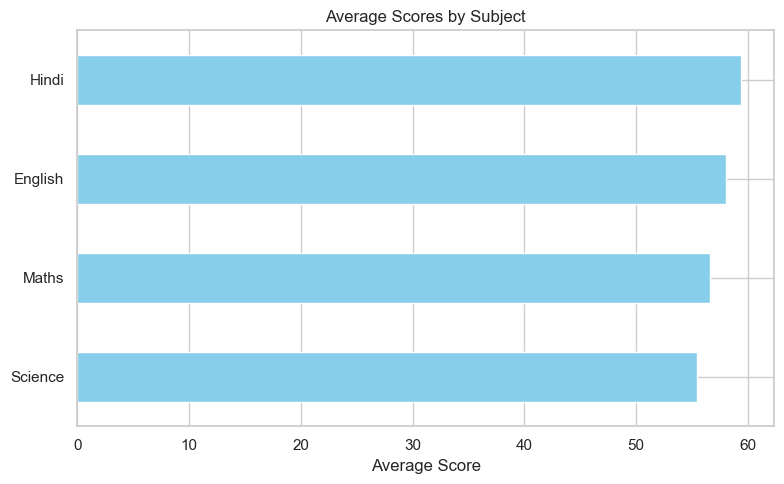

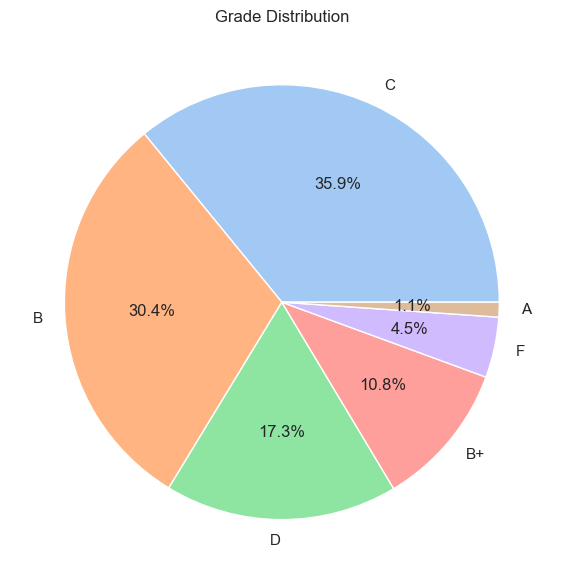

C:\Users\HP\AppData\Local\Temp\ipykernel_13968\3430893166.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




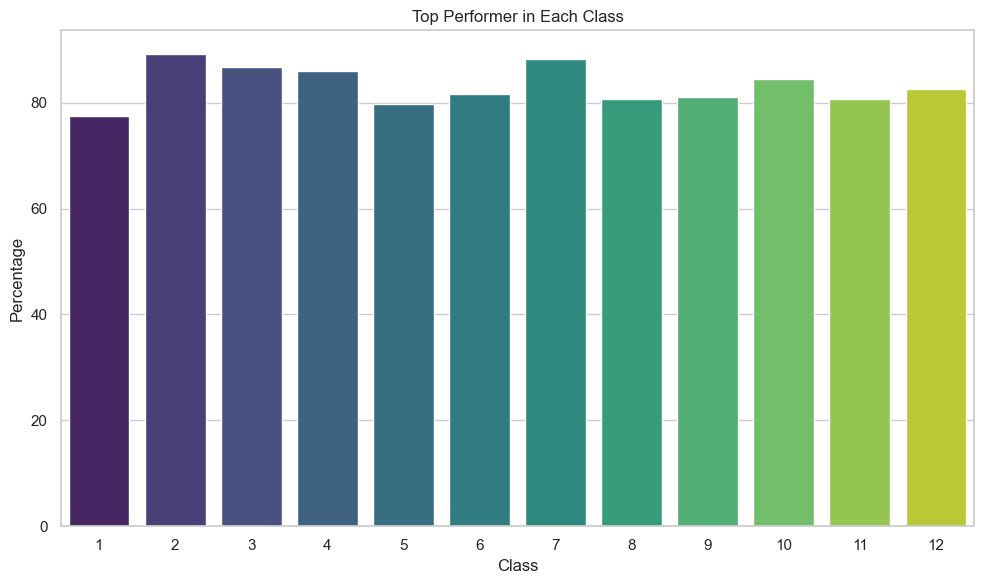

In [23]:
sns.set(style="whitegrid")

# Subject-wise average scores
plt.figure(figsize=(8, 5))
average_scores.sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Scores by Subject")
plt.xlabel("Average Score")
plt.tight_layout()
plt.show()

# Grade distribution pie chart
plt.figure(figsize=(6, 6))
plt.pie(grade_distribution, labels=grade_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Grade Distribution")
plt.tight_layout()
plt.show()

# Top performers in each class
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Percentage', data=top_performers, palette='viridis')
plt.title("Top Performer in Each Class")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()